In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")

# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV 
from catboost import CatBoostRegressor 
from xgboost import XGBRegressor 
from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer
import warnings

# Splitting the X and Y Variables

In [5]:
# Read the CSV file into a Pandas DataFrame
df = pd.read_csv("StudentsPerformance.csv")

# We use the math score as a dependent variable
X = df.drop(columns="math score",axis=1)

y = df["math score"] 

In [24]:
X.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [27]:
# Create Column Transformer with 3 Types  of Transformers

num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

#preprocessor = column
preprocessor = ColumnTransformer([("OneHotEncoder", oh_transformer, cat_features), 
                                  ("StandardScaler", numeric_transformer, num_features)])

X = preprocessor.fit_transform(X)

In [31]:
# Separate Dataset into Train and Test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

X_train.shape, X_test.shape

((800, 19), (200, 19))

In [12]:
# This function is use to evaluate the model and build a good model.

def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [52]:
# To create a models variable and form a dictionary formate.

models = {"Linear Regression": LinearRegression(),
          "Lasso": Lasso(),
          "K-Neighbors Regressor": KNeighborsRegressor(),
          "Decision Tree": DecisionTreeRegressor(),
          "Random Forest Regressor": RandomForestRegressor(),
          "Gradient Boosting": GradientBoostingRegressor(),
          "XGBRegressor": XGBRegressor(), 
          "CatBoosting Regressor": CatBoostRegressor(),
          "AdaBoost Regressor": AdaBoostRegressor()}

model_list = []
r2_list =[]

for i in range(len(list(models))):
    #print(f"{i}")
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    print(list(models.keys())[i])    
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))
    print()
    print('----------------------------------')
    print()
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    

r2_list.append(model_test_r2) 
print('='*35)
print('\n') 

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.3273
- Mean Squared Error: 28.3805
- Mean Absolute Error: 4.2787
- R2 Score: 0.8741

----------------------------------

Model performance for Test set
- Root Mean Squared Error: 5.4096
- Mean Squared Error: 5.4096
- Mean Absolute Error: 4.2259
- R2 Score: 0.8797
Lasso
Model performance for Training set
- Root Mean Squared Error: 6.5938
- Mean Squared Error: 43.4784
- Mean Absolute Error: 5.2063
- R2 Score: 0.8071

----------------------------------

Model performance for Test set
- Root Mean Squared Error: 6.5197
- Mean Squared Error: 6.5197
- Mean Absolute Error: 5.1579
- R2 Score: 0.8253
K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7122
- Mean Squared Error: 32.6294
- Mean Absolute Error: 4.5187
- R2 Score: 0.8553

----------------------------------

Model performance for Test set
- Root Mean Squared Error: 7.2516
- Mean Squared Error: 7.2516
- Mean Absolute Err

### Hyperparameter Tuning

In [53]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import make_scorer

# Define hyperparameter ranges for each model
param_grid = {"Linear Regression": {},
              "Lasso": {"alpha": [1]},
              "K-Neighbors Regressor": {"n_neighbors": [3, 5, 7],},
              "Decision Tree": {"max_depth": [3, 5, 7],'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson']},
              "Random Forest Regressor": {'n_estimators': [8,16,32,64,128,256], "max_depth": [3, 5, 7]},
              "Gradient Boosting": {'learning_rate':[.1,.01,.05,.001],'subsample':[0.6,0.7,0.75,0.8,0.85,0.9],'n_estimators': [8,16,32,64,128,256]},
              "XGBRegressor": {'depth': [6,8,10],'learning_rate': [0.01, 0.05, 0.1],'iterations': [30, 50, 100]},
              "CatBoosting Regressor": {"iterations": [100, 500], "depth": [3, 5, 7]},
              "AdaBoost Regressor": {'learning_rate':[.1,.01,0.5,.001],'n_estimators': [8,16,32,64,128,256]}}

model_list = []
r2_list = []

for model_name, model in models.items():
    # Create a scorer object to use in grid search
    scorer = make_scorer(r2_score)

    # Perform grid search to find the best hyperparameters
    grid_search = GridSearchCV(model, 
                               param_grid[model_name], 
                               scoring=scorer, 
                               cv=5,
                               n_jobs=-1)
    
# Train the model with the best hyperparameters
grid_search.fit(X_train, y_train) 

# Make predictions 
y_train_pred = grid_search.predict(X_train)
y_test_pred = grid_search.predict(X_test) 

# Evaluate Train and Test dataset 
model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred) 

model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred) 

print(model_name) 

model_list.append(model_name) 

print('Best hyperparameters:', grid_search.best_params_) 
print('Model performance for Training set') 
print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse)) 
print("- Mean Squared Error: {:.4f}".format(model_train_mse)) 
print("- Mean Absolute Error: {:.4f}".format(model_train_mae)) 
print("- R2 Score: {:.4f}".format(model_train_r2)) 

print('----------------------------------') 

print('Model performance for Test set')
print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse)) 
print("- Mean Squared Error: {:.4f}".format(model_test_rmse))
print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
print("- R2 Score: {:.4f}".format (model_test_r2))

r2_list.append(model_test_r2) 
print('='*35) 
print('\n')



AdaBoost Regressor
Best hyperparameters: {'learning_rate': 0.5, 'n_estimators': 256}
Model performance for Training set
- Root Mean Squared Error: 5.8300
- Mean Squared Error: 33.9884
- Mean Absolute Error: 4.7732
- R2 Score: 0.8492
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.9421
- Mean Squared Error: 5.9421
- Mean Absolute Error: 4.6313
- R2 Score: 0.8549




### Model selection

In [61]:
print("The following model is selected.")
print("----------------------------------------------------------------")
print(f"The accuracy of {model_list} is {r2_list}")
print()
pd.DataFrame(list(zip(model_list, r2_list)), 
             columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)


The following model is selected.
----------------------------------------------------------------
The accuracy of ['AdaBoost Regressor'] is [0.8548987660284234]



,Model Name,R2_Score
0,AdaBoost Regressor,0.854899


In [66]:
model_chosen = AdaBoostRegressor(random_state=0, n_estimators=100)
model_chosen.fit(X_train, y_train) # Train model

# Make predictions
y_train_pred2 = model_chosen.predict(X_train)
y_test_pred2 = model_chosen.predict(X_test)

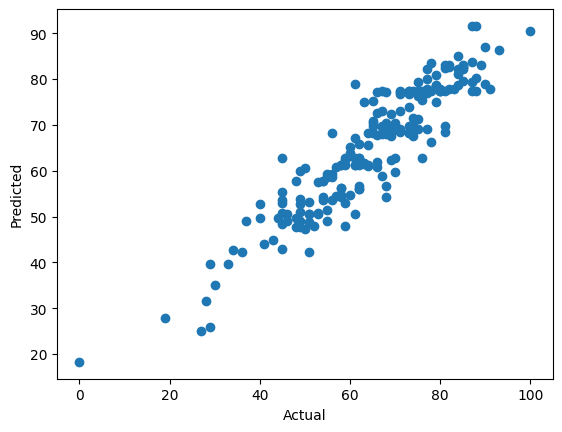

In [68]:
plt.scatter(y_test,y_test_pred2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()

<Axes: xlabel='math score'>

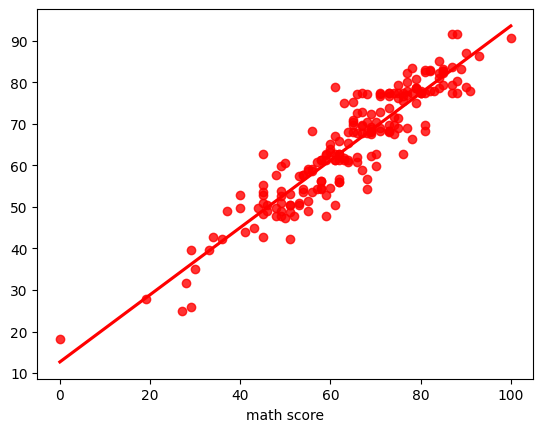

In [69]:
sns.regplot(x=y_test,
            y=y_test_pred2,
            ci=None,
            color ='red')

In [70]:
# Difference Between Actual and Predicted Values
pred_df=pd.DataFrame({'Actual Value':y_test,
                      'Predicted Value':y_test_pred2,
                      'Difference':y_test-y_test_pred2})

pred_df

,Actual Value,Predicted Value,Difference
521,91,77.847826,13.152174
737,53,57.540230,-4.540230
740,80,77.363128,2.636872
660,74,77.476744,-3.476744
411,84,82.285714,1.714286
...,...,...,...
408,52,47.905844,4.094156
332,62,56.627586,5.372414
208,74,67.595960,6.404040
613,65,68.119171,-3.119171
